# Project _Kaudruck_

### Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
from skimage import io

In [3]:
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path.append(src_dir)

In [4]:
from kaudruck import KauDruck, plot_aoi_aor

## Load sample images

In [13]:
filenames = {}
filenames[1] = os.path.join(os.pardir, 'data', 'Versuch 2 -Eindruck 50N-2N.tif')
filenames[2] = os.path.join(os.pardir, 'data', 'Serie1_4_0mmKugel_13032019.tif')
filenames[3] = os.path.join(os.pardir, 'data', 'Serie1_6_5mmKugel_13032019.tif')

In [14]:
filenames

{1: '../data/Versuch 2 -Eindruck 50N-2N.tif',
 2: '../data/Serie1_4_0mmKugel_13032019.tif',
 3: '../data/Serie1_6_5mmKugel_13032019.tif'}

## Select image by using its key
> __e.g. 1 or 2__



In [19]:
key = 3

## Plot the image

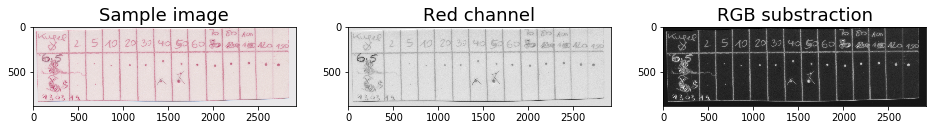

In [20]:
img = io.imread(filenames[key])
fig, ax = plt.subplots(ncols=3, figsize=(16,8))
ax[0].imshow(img)
ax[0].set_title('Sample image', size=18)
ax[1].imshow(img[:,:,0], cmap=cmap.gray)
ax[1].set_title('Red channel', size=18)
ax[2].imshow(((1-img[:,:,1]/255) + (1-img[:,:,2]/255))/2 , cmap=cmap.gray)
ax[2].set_title('RGB substraction', size=18);

## Run analysis

In [9]:
print(filenames[key])

../data/Versuch 2 -Eindruck 50N-2N.tif


### Set parameters

In [10]:
kd = KauDruck(image_path=filenames[key])

# HERE you set the area of interest (AOI)
x_aoi = 2450
y_aoi = 450
height_aoi = 100
width_aoi = 100

# HERE you set the area of reference (AOR)
x_aor = 2650
y_aor = 450
height_aor = 100
width_aor = 100

# HERE you set the threshold
threshold = 0.3

# HERE you set the force applied to the area of reference
force_aor = 50

### Check AOI and AOR

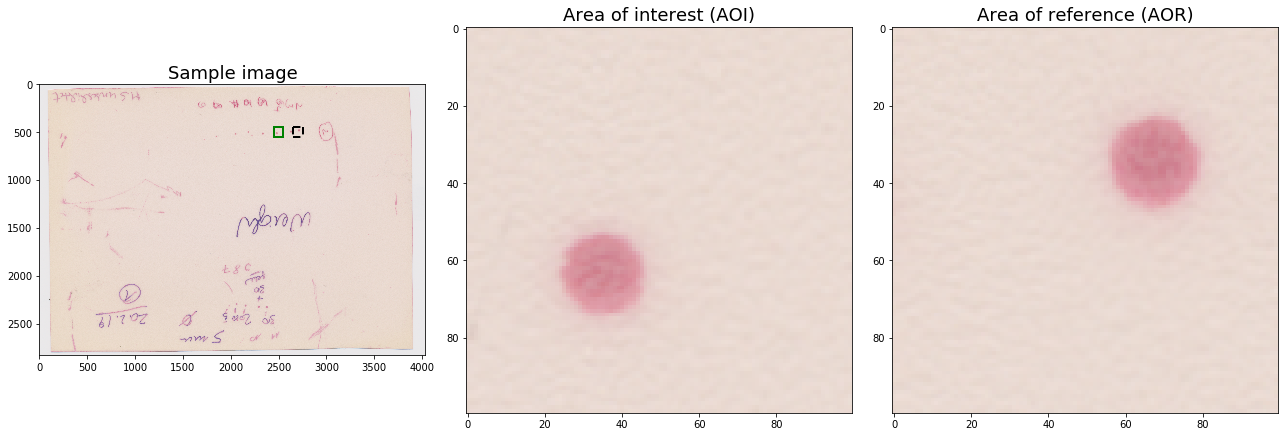

In [11]:
kd.set_aoi(xy = (x_aoi, y_aoi), height=height_aoi, width=width_aoi) 
kd.set_aor(xy = (x_aor, y_aor), height=height_aor, width=width_aor)
kd.set_schwelle(threshold=threshold)
kd.set_aor_force(force_N=force_aor)
plot_aoi_aor(kd)

### Compute results

In [12]:
kd.run_analysis()


Area of reference
------------------------------
Fläche (pixel):          414
Farbgewicht:             168
Gewicht/Fläche:          0.407
Fläche (mm, korrigiert): 0.42
Kraft (N):               50
Druck (MPa):             120.06

Area of interest
------------------------------
Fläche (pixel):          336
Farbgewicht:             133
Gewicht/Fläche:          0.397
Fläche (mm, korrigiert): 0.34
Kraft (N):               39.63
Druck (MPa):             117.24
